# Question

a) Check if your dataset has any canceled flights.

b) If it does, what was the most frequent reason for each departure airport? Output airport name, the most frequent reason, and the number of cancelations for that reason.

# Query

For 6A

```sql
select
    count(*) as num_canceled_flights
from al_perf
where Cancelled = 1;
```

For 6B

```sql
with AirportCancellationCounts as (
    select 
        al_perf.OriginAirportID,
        L_AIRPORT_ID.Name as Airport_Name,
        al_perf.CancellationCode,
        count(*) as Number_Of_Cancellations
    from al_perf
    join L_AIRPORT_ID on al_perf.OriginAirportID = L_AIRPORT_ID.ID
    where al_perf.Cancelled = 1
    group by al_perf.OriginAirportID, L_AIRPORT_ID.Name, al_perf.CancellationCode
),
MostFrequentPerAirport as (
    select 
        OriginAirportID,
        max(Number_Of_Cancellations) as Max_Cancellations
    from AirportCancellationCounts
    group by OriginAirportID
)
select
    AirportCancellationCounts.Airport_Name,
    L_CANCELATION.Reason as Most_Frequent_Reason,
    AirportCancellationCounts.Number_Of_Cancellations
from AirportCancellationCounts
join MostFrequentPerAirport 
    on AirportCancellationCounts.OriginAirportID = MostFrequentPerAirport.OriginAirportID
    and AirportCancellationCounts.Number_Of_Cancellations = MostFrequentPerAirport.Max_Cancellations
join L_CANCELATION on AirportCancellationCounts.CancellationCode = L_CANCELATION.Code
order by AirportCancellationCounts.Number_Of_Cancellations desc;
``` 


# Result

for 6A 1 row returned.

for 6B 217 rows returned.

# Visualization

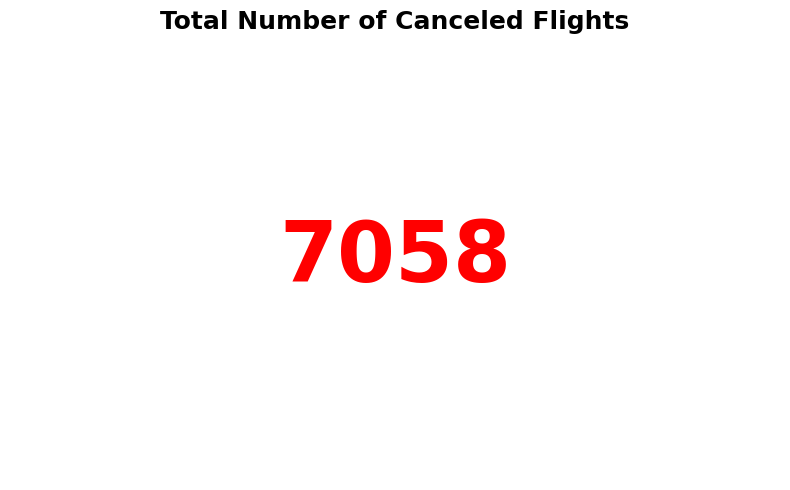

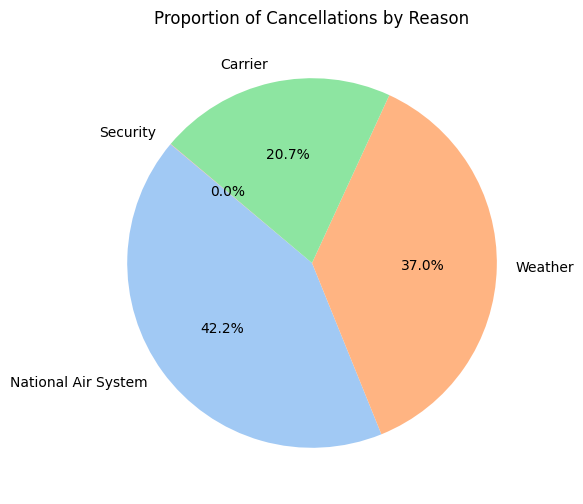

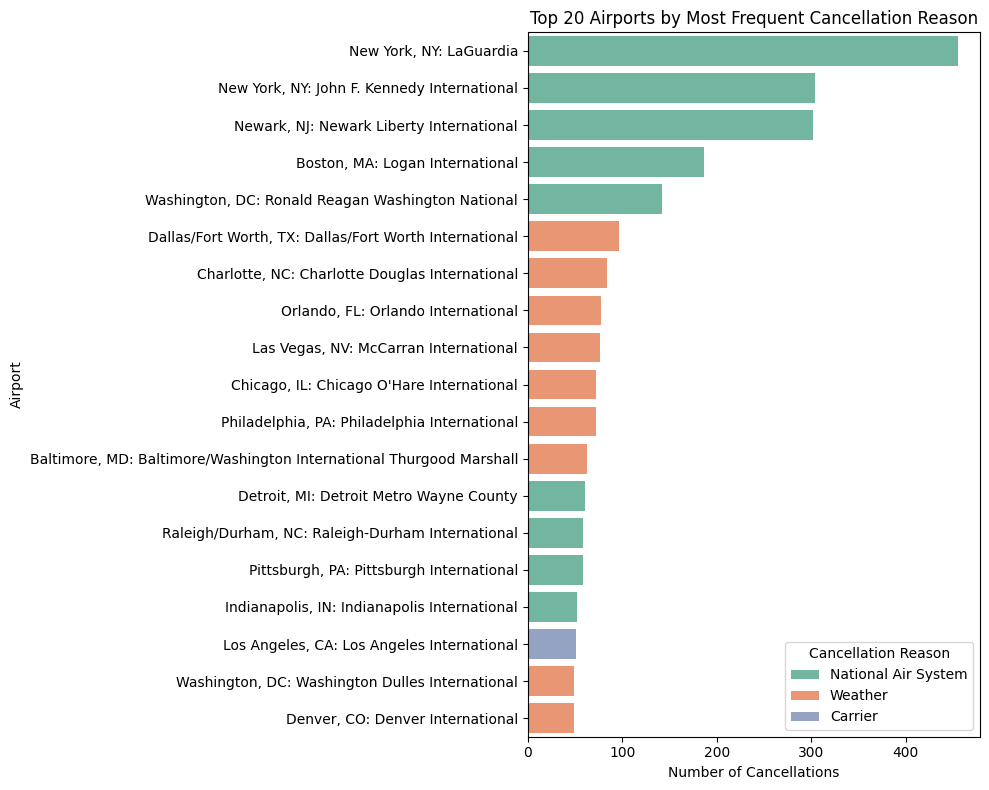

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../csv/Q6A.csv")      # Total number of canceled flights
cancel_df = pd.read_csv("../csv/cancel.csv")  # Cancellations by reason
q6b_df = pd.read_csv("../csv/Q6B.csv")  # Most frequent cancellation reason per airport

# Big Number Plot: Total canceled flights 
num_canceled_flights = df.loc[0, 'num_canceled_flights']

plt.figure(figsize=(8,5))
plt.text(0.5, 0.5, f"{num_canceled_flights}", fontsize=60, ha='center', va='center', color='red', fontweight='bold')
plt.axis('off')
plt.title("Total Number of Canceled Flights", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Pie Chart: Proportion of cancellations by reason 
plt.figure(figsize=(6,6))
plt.pie(cancel_df['Number_Of_Cancellations'],
        labels=cancel_df['Cancellation_Reason'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))
plt.title("Proportion of Cancellations by Reason")
plt.show()

# Select top 20 airports by cancellations
top_airports = q6b_df.sort_values('Number_Of_Cancellations', ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top_airports,
    x='Number_Of_Cancellations',
    y='Airport_Name',
    hue='Most_Frequent_Reason',
    dodge=False,
    palette="Set2"
)
plt.title("Top 20 Airports by Most Frequent Cancellation Reason")
plt.xlabel("Number of Cancellations")
plt.ylabel("Airport")
plt.legend(title="Cancellation Reason")
plt.tight_layout()
plt.show()